In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats
%matplotlib inline

In [2]:
top11data=pd.read_csv('top11data.csv')

In [3]:
#drop null values and 0s
outlierdata4 = top11data.dropna(subset=['appv_NotNormalized'],how='any')
outlierdata4= outlierdata4[outlierdata4.appv_NotNormalized != 0]

In [4]:
#New York-Newark-Jersey City
df1=outlierdata4[outlierdata4['CBSAName']=='New York-Newark-Jersey City']
df1.shape

(42960, 54)

In [5]:
pd.options.display.float_format = '{:.0f}'.format
df1.groupby(['propertytypemajor'])['appv_NotNormalized'].describe()

,count,mean,std,min,25%,50%,75%,max
propertytypemajor,,,,,,,,
Agricultural,23,3026348,3208167,200000,735000,1420000,4935000,10300000
Assembly/Meeting Place,292,7791531,14595353,150000,1800000,3767500,8000000,137000000
Equipment,21,1614762,1604929,145000,850000,1170000,1890000,7900000
Health Care,393,21878823,31139385,175000,2200000,7200000,30000000,183000000
Industrial,2542,8006718,18281158,1,1350000,2900000,7850000,391500000
Land,414,60943271,171819855,20,2200000,9825000,36400000,1673000000
Lodging/Hospitality,787,66661282,101524343,140000,12682500,32500000,86000000,1750000000
Multi-Family,17671,16576327,50880278,1,2500000,5670000,12600000,1547000000
Office,4561,36956847,157343951,-835000,950000,2850000,14200000,2900000000


In [7]:
#creating subsets
MultiFamily1=df1[df1['propertytypemajor']=='Multi-Family']

C:\Users\txia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


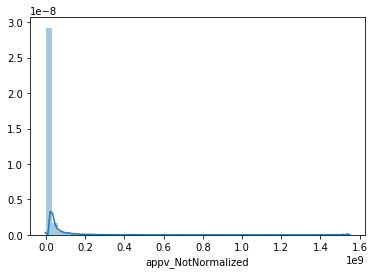

In [9]:
sns.distplot(MultiFamily1['appv_NotNormalized'])

In [11]:
#creating z score column
MultiFamily1['z']=np.abs(stats.zscore(MultiFamily1['appv_NotNormalized']))

C:\Users\txia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
MultiFamily1.head()

,Unnamed: 0,y,yq,ca,ca_NotNormalized,ia,ia_NotNormalized,da,da_NotNormalized,ma,...,psize,psize2,yearb,bclass,PropertyID,LenderID,propertytypemajor,CBSAName,MeasurUnit,z
10955,82975,2018,2018Q1,nan,nan,nan,nan,nan,nan,nan,...,16,nan,nan,nan,1168648,20405,Multi-Family,New York-Newark-Jersey City,Units,0
10963,83003,2020,2020Q1,nan,nan,nan,nan,nan,nan,nan,...,58,nan,nan,nan,1031717,12812,Multi-Family,New York-Newark-Jersey City,Units,1
10966,83058,2012,2012Q1,nan,nan,nan,nan,nan,nan,nan,...,75,nan,nan,nan,1293404,51409,Multi-Family,New York-Newark-Jersey City,Units,2
10967,83068,2017,2017Q2,nan,nan,nan,nan,nan,nan,nan,...,286,nan,nan,nan,402625,11811,Multi-Family,New York-Newark-Jersey City,Units,0
10968,83069,2019,2019Q2,nan,nan,nan,nan,nan,nan,nan,...,286,nan,nan,nan,402625,11811,Multi-Family,New York-Newark-Jersey City,Units,9


In [16]:
MultiFamily1 = MultiFamily1[MultiFamily1['z'] < 3]

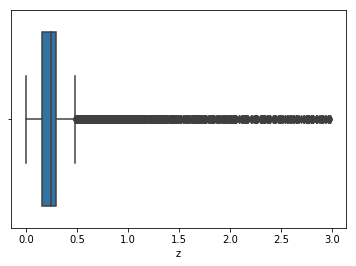

In [17]:
sns.boxplot(MultiFamily1['z'])